In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  datasets, cross_validation, ensemble

In [3]:
# 使用sklearn自带的糖尿病数据
def load_data():
    diabetes = datasets.load_diabetes()
    return cross_validation.train_test_split(diabetes.data,diabetes.target,test_size=0.25,random_state=0)

In [4]:
def test_RFR(*data):
    X_train,X_test,Y_train,Y_test = data
    gegr = ensemble.RandomForestRegressor()
    gegr.fit(X_train,Y_train)
    print('Traing score:{0}'.format(gegr.score(X_train,Y_train)))
    print('Testing score:{0}'.format(gegr.score(X_test,Y_test)))

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_RFR(X_train,X_test,Y_train,Y_test)

Traing score:0.9031483723385461
Testing score:0.11874212976571819


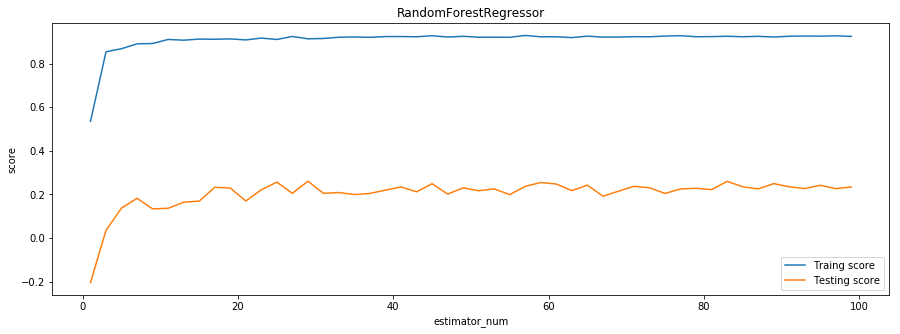

In [5]:
# 考个体决策树的数量对结果的影响
def test_RFR_num(*data):
    X_train,X_test,Y_train,Y_test = data
    nums = np.arange(1,100,step=2)
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    traing_score=[]
    testing_score=[]
    for num in nums:
        clf = ensemble.RandomForestRegressor(n_estimators=num)
        clf.fit(X_train,Y_train)
        traing_score.append(clf.score(X_train,Y_train))
        testing_score.append(clf.score(X_test,Y_test))
        
    ## 绘图 
    ax.plot(nums, traing_score,  label='Traing score')
    ax.plot(nums, testing_score, label='Testing score')
    ax.set_xlabel('estimator_num')
    ax.set_ylabel('score')
    ax.legend(loc='lower right')
    ax.set_title('RandomForestRegressor')    
    plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_RFR_num(X_train,X_test,Y_train,Y_test)

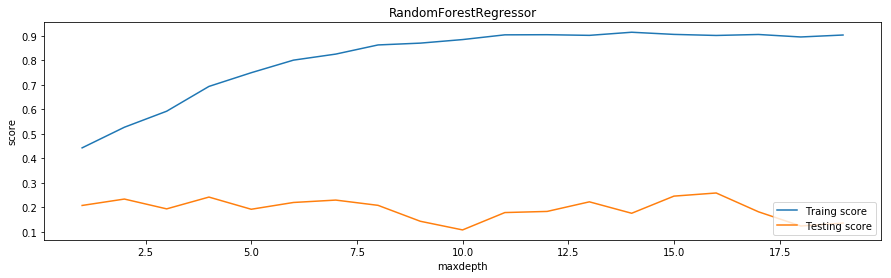

In [11]:
# 最大树深对结果的影响
def test_RFR_maxdepth(*data):
    X_train,X_test,Y_train,Y_test = data
    maxdepths = np.arange(1,20)
    fig = plt.figure()
    fig.set_figwidth(15)
    ax = fig.add_subplot(111)
    traing_score=[]
    testing_score=[]
    for maxdepth in maxdepths:
        clf = ensemble.RandomForestRegressor(max_depth=maxdepth)
        clf.fit(X_train,Y_train)
        traing_score.append(clf.score(X_train,Y_train))
        testing_score.append(clf.score(X_test,Y_test))
        
    ## 绘图 
    ax.plot(maxdepths, traing_score,  label='Traing score')
    ax.plot(maxdepths, testing_score, label='Testing score')
    ax.set_xlabel('maxdepth')
    ax.set_ylabel('score')
    ax.legend(loc='lower right')
    ax.set_title('RandomForestRegressor')    
    plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_RFR_maxdepth(X_train,X_test,Y_train,Y_test)

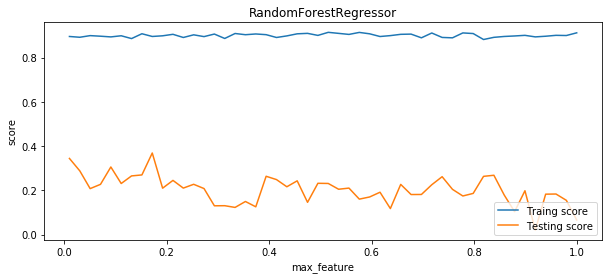

In [12]:
# 考虑max_features对结果的影响
def test_RFR_max_feature(*data):
    X_train,X_test,Y_train,Y_test = data
    max_features = np.linspace(0.01,1.0)
    fig = plt.figure()
    fig.set_figwidth(10)
    ax = fig.add_subplot(111)
    traing_score=[]
    testing_score=[]
    for max_feature in max_features:
        clf = ensemble.RandomForestRegressor(max_features=max_feature)
        clf.fit(X_train,Y_train)
        traing_score.append(clf.score(X_train,Y_train))
        testing_score.append(clf.score(X_test,Y_test))
        
    ## 绘图 
    ax.plot(max_features, traing_score,  label='Traing score')
    ax.plot(max_features, testing_score, label='Testing score')
    ax.set_xlabel('max_feature')
    ax.set_ylabel('score')
    ax.legend(loc='lower right')
    ax.set_title('RandomForestRegressor')    
    plt.show()

# 开始测试：
X_train,X_test,Y_train,Y_test = load_data()
test_RFR_max_feature(X_train,X_test,Y_train,Y_test)